Macarena Benjamin

1) Elija o recolecte un corpus de documentos.

2) Realice una breve descripción del corpus. Especifique el número de documentos que hay en el corpus y la cantidad de palabras que conforman el vocabulario.

3) Plantee el objetivo del modelo y el método que aplicará sobre el corpus (Predicción, clasificación, resumen, etc) de acuerdo al objetivo propuesto.

4) Escriba una notebook colab con el código necesario para ejecutar el método elegido sobre el corpus. 

5) Ejecute el código e interprete los resultados.

6) Escriba un documento con las siguientes partes:
- Resumen.
- Descripción del corpus.
- Breve descripción del método y su codificación en Python.
- Exponga los resultados y escriba una interpretación en contexto organizacional de los mismos.



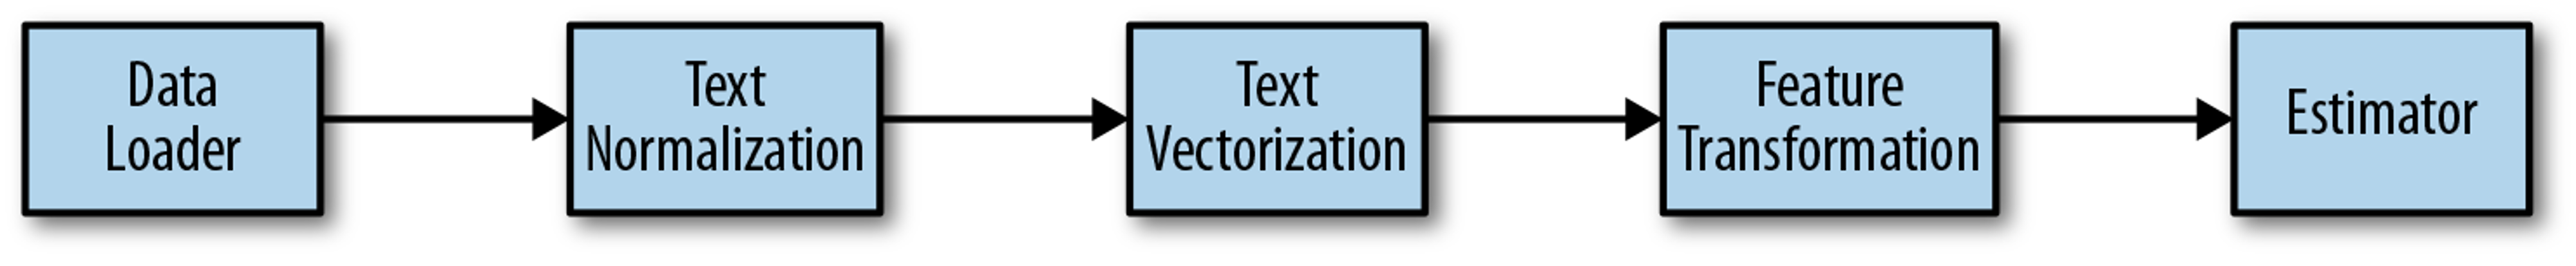

# **Introduccion al set de datos**

El set de datos presenta distintas criticas de peliculas en español y en ingles y su respectivo sentimiento "positivo" o "negativo"

El objetivo del trabajo es predecir la clasificacion del sentimiento segun la critica proporcionada.

El set de datos presenta una longitud de 50.000 registros


# **Extraccion de los datos**

In [ ]:
# Instalar las librerías que sean necesarias
%pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Importación de librerías
import numpy as np
import pandas as pd
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import openai
import gradio as gr

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datasets import load_dataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Desde archivos en Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Especifica la ruta completa del archivo en tu Drive
ruta_csv = "/content/drive/MyDrive/IMDB Dataset SPANISH.csv"


# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_csv)

In [ ]:
# Mostrar las primeras filas
df.head(10)

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
5,5,"Probably my all-time favorite movie, a story o...",Probablemente mi película favorita de todos lo...,positive,positivo
6,6,I sure would like to see a resurrection of a u...,Seguro que me gustaría ver una resurrección de...,positive,positivo
7,7,"This show was an amazing, fresh & innovative i...","Este espectáculo fue una idea increíble, fresc...",negative,negativo
8,8,Encouraged by the positive comments about this...,Alentados por los comentarios positivos sobre ...,negative,negativo
9,9,If you like original gut wrenching laughter yo...,"Si te gusta la risa original desgarradora, te ...",positive,positivo


In [ ]:
len(df)

50000

In [ ]:
#Me quedo solo con las columnas de review_es y sentimiento

df = df[["review_es", "sentimiento"]]
df.head()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


# **Normalizacion de textos**

Se utilizan los siguientes metodos:
- **Conversión a minúsculas**: Se aplica text.lower() para estandarizar el texto y evitar que "Excelente" y "excelente" se traten como diferentes.

- **Tokenización (con spaCy)**: Se convierte el texto completo en una lista de tokens (palabras) utilizando el modelo de spaCy.Esto incluye el reconocimiento de palabras, puntuación, espacios, etc.

- **Eliminación de palabras cortas**: Se descartan tokens con longitud menor o igual a 4 caracteres (len(token) > 4). Esto ayuda a reducir ruido eliminando palabras poco informativas.

- **Eliminación de stopwords**: Se usan las stopwords del paquete NLTK en español (stopwords.words('spanish')) para quitar palabras comunes como “pero”, “como”, “entre”, etc.

- **Eliminación de acentos**: Se usa unidecode.unidecode(token) para quitar acentos de las letras (por ejemplo: “acción” → “accion”).Mejora la consistencia léxica del vocabulario.

- **Lematización con spaCy**: Se transforma cada palabra a su forma base o diccionario (por ejemplo: “trabajando” → “trabajar”, “mejores” → “mejor”). Esto permite agrupar variantes gramaticales de la misma palabra y reduce la dimensionalidad del texto.

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 80.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#librerias
import unidecode
import spacy
import nltk
from nltk.corpus import stopwords

#stopwords
nltk.download('stopwords', quiet=True)

#spaCy para tokenizacion y lematizacion en español
parser = spacy.load("es_core_news_sm")  # modelo para español

#definir stopwords en español
stopwords_es = set(stopwords.words('spanish'))

#funcion para lematizar usando spaCy (procesando oracion completa)
def lemmatize_text(tokens):
    doc = parser(" ".join(tokens))  # convierte tokens en doc spaCy
    return [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

#funcion principal de normalizacion
def process_text(text):
    if not text:
        return ""
    doc = parser(text.lower())  #pasar todo a minusculas y procesar con spaCy
    tokens = [
        unidecode.unidecode(token.text) for token in doc
        if not token.is_punct and not token.is_space
        and len(token.text) > 4
        and token.text not in stopwords_es
    ]
    tokens = lemmatize_text(tokens)  #lematizacion
    return " ".join(tokens)

#aplicar al DataFrame
df['review_es_normalizada'] = df['review_es'].astype(str).apply(process_text)

#mostrar una muestra
df[['review_es', 'review_es_normalizada', 'sentimiento']].sample(5)


,review_es,review_es_normalizada,sentimiento
37533,Esta encantadora película se basa en una novel...,encantador pelicula novela paasilinna.el bests...,positivo
36342,"¡Ignora las malas críticas en aquí, esta pelíc...","ignorar mala critica pelicular increible!""just...",positivo
25308,Después de algunas películas de acción holande...,despues pelicula accion holandesa bastante bue...,negativo
37123,"Lo siento, pero esto puede haber estado aterra...",sentir poder haber aterrar salio tiempo modern...,negativo
41626,Vi la película anoche y realmente quería gusta...,pelicular anoche realmente querio gustarme exp...,negativo


# **NPL Clasico**

## **Pipeline**

**- VECTORIZACION**: se usa el **metodo TF-IDF (Term Frequency – Inverse Document Frequency)** : una técnica que mide la importancia relativa de una palabra en un documento comparado con todo el corpus


**- REDUCCION DE LA DIMENSIONALIDAD (Featurizacion)** : se usa TruncatedSVD que es la implementación de **LSI (Latent Semantic Indexing)** en scikit-learn.

**- ESTIMADOR**: se usa **RandomForest**


In [ ]:
#Librerías necesarias
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf=True, sublinear_tf=True, norm='l2')),
    ('dim_reduction', TruncatedSVD(n_components=100, random_state=2025)), # El "k" o "n_components" en sk-learn debe estar entre 50 y 300
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=2025))
])

#División en entrenamiento y test
X = df['review_es_normalizada']
y = df['sentimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2025)

#Entrenamiento
pipeline.fit(X_train, y_train)

#Predicción y evaluación
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negativo       0.82      0.80      0.81      5000
    positivo       0.81      0.82      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



# **NPL Neural**

## **Tokenización y Padding**

Convertimos las reviews normalizadas a secuencias de índices, donde cada palabra será representada por su índice en un diccionario. Luego, rellenamos las secuencias para que todas tengan la misma longitud (se aplica a las variables X)


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parámetros de la tokenización
VOCAB_SIZE = 20000  # Tamaño máximo del vocabulario
MAX_LEN = 100  # Longitud máxima de las secuencias

# Inicializamos el tokenizer
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review_es_normalizada'])  # Ajustamos el tokenizer a las reviews

# Convertimos las reviews en secuencias de índices
sequences = tokenizer.texts_to_sequences(df['review_es_normalizada'])

# Rellenamos las secuencias para que todas tengan la misma longitud
X_pad = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# Mostrar las primeras secuencias procesadas
print(X_pad[:5])  # Las primeras 5 secuencias


[[  609  1288    75   137  4247   131   434   727  1804    14  1358  4840
     11   427     1    32   594   193  2992   101   467   302  3155   101
   5996 12951   508   652   427  6994   225   193   295  8024     1  1056
   1637 13454  1229   550   147     1  2145  3879  1158    57  3762   581
   4113   687   197  6862 16147 19293   762     1  4983 11652  4036  1744
    765  3919   315   918  2898   633  1320   389  9791    30   411  3173
     76   450   101    15  1291     1 10537   112   569 14631   129  2009
    755   300  7949   619    14   137    26   630   603  1646  1808    19
    703  2762 14943   150]
 [  421   421   219    39  1037  1522 16149   276   455  1512 13181    70
   1553    70   259   171    25   410  1685   308  4021     1    57  1721
      1     9     5   506   281 10713   871  1671  1902  1309  2883   259
      1   310     1   463   219  3826    68   464   815   360    60  1512
      9   164   421    51  1231  2346    28  2088   562  1944  1017   956
     74    

## **Encodear etiquetas**

Las etiquetas (sentimiento) deben ser convertidas a valores numéricos (0 o 1), donde positivo será 1 y negativo será 0 (se aplica a la variable y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador
encoder = LabelEncoder()

# Aplicamos el codificador a las etiquetas
y_encoded = encoder.fit_transform(df['sentimiento'])  # 'positivo' = 1, 'negativo' = 0

# Ver los resultados
print(y_encoded[:5])  # Primeras 5 etiquetas codificadas


[1 1 1 0 1]


## **Crear sets de entrenamiento y test**

In [ ]:
# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, stratify=y_encoded, random_state=2025)


## **Preparacion de datasets de TensorFlow**

Ahora que tenemos las secuencias y las etiquetas listas, las convertimos en un formato que TensorFlow pueda usar durante el entrenamiento. Usamos tf.data.Dataset para organizar los datos en batches, lo que mejora el rendimiento del modelo.

In [ ]:
import tensorflow as tf

batch_size = 64

# Crear el dataset de entrenamiento
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Crear el dataset de prueba
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


## **Modelo Neural con Keras**

Ahora construimos el modelo neural para clasificación binaria usando LSTM (para procesar secuencias de texto). Este modelo usa embeddings para representar las palabras en un espacio de alta dimensión.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parámetros
embedding_dim = 100  # Dimensión de los embeddings
vocab_size = len(tokenizer.word_index) + 1  # El tamaño del vocabulario es el número de palabras únicas
MAX_LEN = 100  # Longitud de las secuencias

# Construcción del modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=MAX_LEN))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## **Entrenamiento**

In [ ]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 471ms/step - accuracy: 0.6894 - loss: 0.5989 - val_accuracy: 0.7475 - val_loss: 0.5886
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 472ms/step - accuracy: 0.8065 - loss: 0.4624 - val_accuracy: 0.7990 - val_loss: 0.4617
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 458ms/step - accuracy: 0.8539 - loss: 0.3657 - val_accuracy: 0.8236 - val_loss: 0.4174
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 472ms/step - accuracy: 0.8903 - loss: 0.2871 - val_accuracy: 0.8416 - val_loss: 0.4072
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 463ms/step - accuracy: 0.9221 - loss: 0.2184 - val_accuracy: 0.8439 - val_loss: 0.4519
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 292s 467ms/step - accuracy: 0.9473 - loss: 0.1690 - val_accuracy: 0.8328 - val_loss: 0.4578
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 293s 469ms/step - accuracy: 0.9573 - loss: 0.1405 - val_accuracy: 0.8397 - val_loss: 0.4981
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 471ms/step - accuracy: 0.9691 -

## **Evaluación**

In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"Accuracy: {acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.8345 - loss: 0.6124
Accuracy: 0.8378


In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      5000
           1       0.83      0.85      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

